In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mpl_toolkits.mplot3d as plt3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
import seaborn as sns

# <p style="text-align: center;"> Principal Component Analysis </p>

#### <p style="text-align: center;"> by Anita K. </p>

###  Table of Contents
* Abstract
* Introduction
* Mathematical Background:
    * Eigenvectors
    * Eigenvalues
    * Eigenbases
    * Computing eigenvectors and eigenvalues
    * Projections
* Defining PCA
* Variance, Covariance and Explained Variance
* Singular Value Decomposition
* Disadvantages and Limitations of PCA
* Naive Bayes Classifiers
* Code Implementations
* Notesd on Hypothesis Testing, Data acquisition, Cleaning and Manipulation 
* Conclusion & References

### Abstract
The purpose of this research paper is to examine the topic of Principal Component Analysis. 
The research approach focuses on outlining the underlying mathematical concepts, and subsequently using that knowledge to explain the nature of PCA. 
Finally, examples of Python implementation are given to demonstrate the practical application of discussed concepts.<br />

The paper will be of interest to readers who are (relative) beginners in terms of mathematics and seek an understanding of the broader picture and rationale behind PCA, before proceeding to implementing them.

### Introduction
Principal Component Analysis (PCA) is a well-established and extensively used multidimensional data analysis technique for reducing the dimensionality of large data sets. It was first coined by Pearson (1901), and developed independently by Hotelling (1933). The complexity of the calculations involved in this technique delayed its development until the birth of computers and its effective use didn't start until the second half of the twentieth century, but it is now well entrenched in virtually every statistical software packages.<br />
The origins of PCA lie in multivariate data analysis; however, it has a wide range of other applications, from theoretical physics to meteorology, psychology, biology, medicine and neuroscience, chemistry, engineering, quantitative finance, machine learning, data compression, image processing, de-noising signals, face and pattern recognition.<br />

Understanding and using PCA requires a solid mathematical foundation - basic knowledge of linear algebra and statistics is essential.<br />

### Mathematical Backgound

The mathematical foundations required to understand the process of Principal Components Analysis include eigenvectors, eigenvalues and eigenbases, projections, standard deviation, variance, covariance and singular value decomposition, to name a few.
These are the main concepts which will be covered in this section.

**Eigenvectors** <p>

The definition of an eigenvector is a vector that responds to a matrix as though that matrix were a scalar coefficient. In the equation $AX = \lambda X$, <br /> $A$ is the matrix, $x$ the vector, and $\lambda$ - the scalar coefficient.
An eigenvector is a vector whose direction remains unchanged when a linear transformation is applied to it, i.e. eigenvectors can only get stretched, but not rotated. <br />

Eigenvectors can be described as the axes along which linear transformation acts, stretching or compressing input vectors. They are the lines of change that represent the action of the larger matrix. Since an eigenvector represents an orientation (the corresponding eigenvalue represents the magnitude), all scalar multiples of the eigenvector are vectors that are parallel to this eigenvector, and are therefore equivalent. <br />

Furthermore, if all basis vectors of a matrix $M$ are also eigenvectors, then the matrix is diagonal.

**Independent Eigenvector Theorem** <br />
If $A$ is an $N x N$ complex matrix with $N$ distinct eigenvalues, then any set of $N$ corresponding eigenvectors form a basis for $\mathbb{C}^{N}$. <br />
To prove this theorem, it would be sufficient to prove that the set of eigenvectors is linearly independent. 

**Eigenvalues** <br />
Eigenvalues characterize important properties of linear transformations, such as whether a system of linear equations has a unique solution or not. In many applications eigenvalues also describe physical properties of a mathematical model. <br />
Eigenvalues are also called characteristic roots. <br />
The eigenvalue for a given factor measures the variance in all the variables which is accounted for by that factor. <br />
The ratio of eigenvalues is the ratio of explanatory importance of the factors with respect to the variables. If a factor has a low eigenvalue, then it is contributing little to the explanation of variances in the variables and may be ignored as redundant with more important factors. <br />
Eigenvalues measure the amount of variation in the total sample accounted for by each factor. <br />
A factor's eigenvalue may be computed as the sum of its squared factor loadings for all the variables. Factor loadings (factor or component coefficients), also called component loadings, are the correlation coefficients between the variables (rows) and factors (columns).

**Eigenbases** <p>
An eigenbasis is a basis in which every vector is an eigenvector. Such a basis only exists if the matrix ($A$) is diagonalizable. To find an eigenbasis, one has to find a basis for each eigenspace of $A$. The collection of all these basis vectors forms the eigenbasis for $A$.

A real matrix is called symmetric if it’s equal to its transposed version ($A^{T} = A$). A symmetric matrix has real eigenvalues, and there is an orthogonal eigenbasis for the symmetric matrix if all its eigenvalues are different.
Symmetric matrices play the same role as the real numbers do among the complex numbers. Their eigenvalues often have physical or geometrical interpretations. One can also calculate with  symmetric matrices like with numbers: for example, we can solve $B^2 = A$ for $B$ if $A$ is a symmetric matrix and $B$ is the square root of $A$ (which is not possible in general).

A diagonal matrix $D$ has eigenbasis $\varepsilon = (\vec{e_{1}}, ..., \vec{e_{n}})$ which is an orthonormal basis. $A \in \mathbb{R}$  is orthogonally diagonalizable if $A$ has an eigenbasis B that is also an orthonormal basis.
If $A$ is orthogonally diagonalizable, then $A$ is symmetric.

Furthermore, the **Spectral theorem** states that a symmetric matrix can be diagonalized with an orthonormal matrix $S$.</p>
*$A \in \mathbb{R}^{n*n}$ is orthogonally diagonalizable if and only if it is symmetric.*
<p>Example:</p>
$A = \begin{bmatrix}
1 & 3 \\ 
-1 & 2
\end{bmatrix}$ is not orthogonally diagonalizable as $A^{T} \neq A$.

The spectrum of a matrix is the set of its eigenvalues.


**Computing eigenvectors and eigenvalues** <p>
$$A \cdot v = \lambda \cdot v\$$

In this equation $A$ is an $n x n$ matrix, $v$ is a non-zero $n$-by-1 vector and $\lambda$ is a scalar (which may be either real or complex).  Any value of $\lambda$ for which this equation has a solution is known as an eigenvalue of the matrix $A$.  It is sometimes also called the characteristic value.  The vector $v$ which corresponds to this value is called an eigenvector. 
</p>    
<p>If $v$ is non-zero, this equation will only have a solution if:<br />
$$\left | A - \lambda\cdot I \right |= 0$$ 

This equation is called the characteristic equation of $A$, and is an $n^{th}$ order polynomial in $\lambda$ with $n$ roots.  These roots are called the eigenvalues of $A$. For each eigenvalue there is an eigenvector for which the eigenvalue equation is true.
The standard way to find eigenvalues is by using the following formula which determines $n$ eigenvalues.<br />
$$AX = \lambda X \ or \ (A - \lambda I_n)X = 0$$

The sum of the $\lambda$’s equals the sum down the main diagonal of $A$ (the trace). The product of the  $\lambda$’s equals the determinant. <br />

It is also worth noting that projections, reflections, $90^o$C rotations have special eigenvalues (1; 0; -1;$i$;$-i$).
Singular matrices have $\lambda = 0$. Triangular matrices have $\lambda$’s on their diagonal.

Computing the eigenvalues in numpy is simple thanks to the function built-in for the purpose of computing the eigenvalues of a general matrix.<br /><br />
Example:

In [216]:
m = np.matrix([[2, -1, 0],
               [-1, 2, -1],
               [0, -1, 2]])
eigenvalues = np.linalg.eigvals(m)
print(eigenvalues)

[3.41421356 2.         0.58578644]


Example of computing the eigenvectors:

In [7]:
K=np.random.normal(size=(2,2))
eigenvalues, eigenvectors = np.linalg.eig(K)
eigenvectors
eigenvectors.shape

(2, 2)

**The Dot Product** <br />
There are two ways to multiply two vectors - one type produces a scalar (the dot product), while the other produces a vector (the cross product). <br />
The dot product can be defined in the following way: <br />
$$\vec{a}\vec{b} = \left | \vec{a}\vec{b} \right | \cos\varphi$$
One important use of dot products is in projections, as the dot product between two vectors is based on the projection of one vector onto another. <br />

**Projections** <br />
In linear algebra and functional analysis, a projection is a linear transformation $P$ from a vector space to itself such that  $P^{2} = P$. That is, whenever it is applied twice to any vector, it gives the same result as if it were applied once (also called idempotent). It leaves its image unchanged. Though abstract, this definition of "projection" formalizes and generalizes the idea of graphical projection. One can also consider the effect of a projection on a geometrical object by examining the effect of the projection on points in the object. <br />
The spectrum (all eigenvalues) of a projection matrix consists of zeroes and ones. <br />
A square matrix $P$ is called an orthogonal projection matrix if $P^{2}=P$ for a real matrix, where $P^{T}$ denotes the transpose of $P$.<br />
The transpose of an orthogonal matrix is equal to the inverse matrix: $C^T = C^{-1}$.
When an **orthogonal matrix** is multiplied by a vector, it **preserves lengths and angles**. <br />
Since any matrix vector product is also a linear transformation, and keeping in mind that an eigenvector's direction remains unchanged when a linear transformation is applied to it, the connection between projections and eigenvectors/eigenvalues becomes clear. In PCA, **it is precisely projection onto eigenvectors that is used to reduce the dimension of the data**. 

**Defining the Principal Component Analysis** <p>
PCA is a technique that finds underlying variables (known as principal components) that best differentiate the data points. PCA transforms a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called **principal components**. The first principal component accounts for as much of the variability in the data as possible, and each succeeding component accounts for as much of the remaining variability as possible. Principal components are the dimensions along which the data points are most spread out. They reflect both common and unique variance of the variables and may be seen as a variance-focused approach seeking to reproduce both the total variable variance with all components and to reproduce the correlations.<br />
In its essence, PCA is a method that finds a lower dimensional representation of high-dimensional data by reducing the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). <br />
  
PCA aims to display the relative positions of data points in fewer dimensions while retaining as much information as possible, and to explore relationships between dependent variables. It seeks a linear combination of variables such that the maximum variance is extracted from them. It then removes this variance and seeks a second linear combination which explains the maximum proportion of the remaining variance, and so on. This is called the principal axis method and results in orthogonal (uncorrelated) factors. PCA analyzes total (common and unique) variance. <br />

In a nutshell, the **PCA algorithm** can be summarized as follows: <br />
Given a data matrix $X$
- Computing all eigenvectors of $XX^T$
- Building a matrix $E$ whose columns are the eigenvectors of $XX^T$
- Defining $P = E^T$ diagonalizes the covariance matrix $S_Y$ of $PX = Y$
- The diagonal elements of $S_Y$ are the eigenvalues and thus measure the variance
- The larger the variance, the more informative the corresponding base vector will be
- Projecting the transformed data matrix $PX$ to the most informative base vectors


**Variance and Covariance** are a measure of the “spread” of a set of points around their center of mass (mean). <br />
Variance is a measure of the deviation from the mean for points in one dimension e.g. heights. Covariance as a measure of how much each of the dimensions vary from the mean with respect to each other. <br />
Covariance is measured between two dimensions to see if there is a relationship between the two dimensions. <br />
A positive value of covariance indicates both dimensions increase or decrease together, while a negative value indicates while one increases the other decreases (or vice-versa). <br />
If covariance is zero, the two dimensions are independent of each other.

**Explained variance** is used to measure the discrepancy between a model and actual data. In other words, it’s the part of the model’s total variance that is explained by factors that are actually present and isn’t due to error variance. <br />

Higher percentages of explained variance indicate a stronger strength of association. It also means that better predictions can be made.<br />
$$r^2 = R^2 = \eta ^2$$

Explained variance can be denoted with $r^2$. In the analysis of variance (ANOVA), it’s called $\eta^2$ and in regression analysis, it’s called the Coefficient of Determination ($R^2$). The three terms are basically synonymous, except that $R^2$ assumes that changes in the dependent variable are due to a linear relationship with the independent variable; $\eta^2$ does not have this underlying assumption. <br />

The objective of PCA is to make the first variable explain as much as possible of the total variance. The total variance is the sum of variances of all individual principal components. The fraction of variance explained by a principal component is the ratio between the variance of that principal component and the total variance.

**Singular Value Decomposition (SVD)** <br />
Any $m x n$ matrix $X$ can be written as the product of 3 matrices, where: <br />
$$X = UDV^T$$
- $U$ is $m x m$ and its columns are orthonormal vectors
- $V$ is $n x n$ and its columns are orthonormal vectors
- $D$ is $m x n$ diagonal and its diagonal elements are called the singular values of $X$. <br />

The SVD properties are:
- The columns of $U$ are the eigenvectors of $XX^T$
- The columns of $V$ are the eigenvectors of $X^TX$
- The squares of the diagonal elements of $D$ are the eigenvalues of $XX^T$ and $X^TX$

Image processing through linear algebra methods relies on SVD. <br />
Any image is in fact a large matrix of grayscale values, one for each pixel and color. When nearby pixels are correlated (not random) the image can be compressed. The SVD separates any matrix $A$ into rank one pieces $uv^T$ = (column)(row).
The columns and rows are eigenvectors of symmetric matrices $AA^T$ and $A^{T}A$. <br />
SVD separates any matrix into simple pieces. Each piece is a column vector times a row vector. An $m x n$ matrix has $m$ times $n$ entries (a big number when the matrix represents an image). But a column and a row only have $m + n$ components, far less than $m$ times $n$. Those (column)(row) pieces are full size matrices that can be processed with extreme speed, as they need only $m + n$ numbers.

Example of computing the **singular value decomposition** (SVD) of a matrix:

In [66]:
m = np.matrix([[1, 0, 0], 
               [1, 1, 0], 
               [0, 0, 1]])
u, s, v = np.linalg.svd(m)
print(u)
print(s)
print(v)
print(np.dot(u, np.dot(np.diag(s), v)))

[[-0.52573111  0.         -0.85065081]
 [-0.85065081  0.          0.52573111]
 [ 0.          1.          0.        ]]
[1.61803399 1.         0.61803399]
[[-0.85065081 -0.52573111 -0.        ]
 [ 0.          0.          1.        ]
 [-0.52573111  0.85065081  0.        ]]
[[ 1.00000000e+00 -1.66533454e-16  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


**Disadvantages and Limitations of PCA** <br />
In data science, sometimes one encounters the "curse of dimensionality", in which there are too many features compared to the number of observations. This can be problematic when fitting a model to the data. A commonly used process is to apply dimensionality reduction techniques such as PCA. PCA transforms the data into a new dimensional space, where each dimension is orthogonal to each other, and the principal components are sorted from the ones that explain the highest to lowest variance. The assumption is that the principal components with the highest variance will be the most useful for solving a machine learning problem, such as predicting if a datapoint belongs to one of two classes. In other words, there is a belief that the interclass variance is larger than the intraclass variance. For example, if there are two classes in a dataset which we want to classify, the principal component with the highest variance would be the best feature that would allow us to separate the data. This assumption, although logical, may not always be true. <br />
PCA is most efficient at reducing dimensionality when the original variables are highly correlated, allowing the majority of variation to be explained by just a few vectors. This means that variables that possess higher degrees of both variance and associated covariance will have a greater influence over how PC axes are determined. <br />
A significant limitation of conventional PCA is that it does not define a probability distribution. In this context, **Bayesian PCA** (or Bayesian treatment of PCA) means formulating PCA as a Bayesian model of the statistical data, instead of using the classic method of finding the covariance matrix of the data and then doing an eigenvalue decomposition of that matrix. 

As we know, **Bayes’ Theorem** finds the probability of an event occurring given the probability of another event that has already occurred. <br />
$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
The formula above expresses the probability of event $A$, given the event $B$ is true. Event $B$ is also termed as evidence.
$P(A)$ is the priori of $A$ (the prior probability, i.e. probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event $B$). $P(A|B)$ is a posteriori probability of $B$, i.e. probability of event after evidence is seen.

**Naive Bayes Classifier** <br />
A Naive Bayes classifier is a probabilistic machine learning model that is used for classification tasks. This technique is particularly suited when the dimensionality of the inputs is high. The crux of the classifier is based on the Bayes theorem.
The fundamental **Naive Bayes** assumption is that each feature makes an independent and equal contribution to the outcome.


### Code Implementations ###

**1.** Transformation from a 2D dataset to 1D

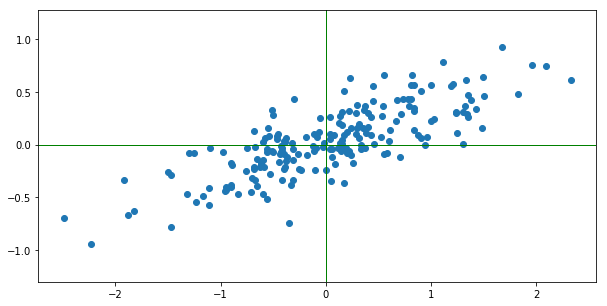

In [83]:
# Random number generator for the dataset:
rng = np.random.RandomState(1)
# Multiply two synthetic datasets to avoid uncorrelated data
dataset = np.dot(rng.rand(2, 3), rng.randn(3, 200)).T

#Plot the dataset
plt.figure(figsize=(10,5))
plt.axis("equal")
plt.axhline(linewidth=1, color="g")
plt.axvline(linewidth=1, color="g")
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.show()

In [89]:
# calculate the mean of each column
dataset_mean = np.mean(dataset.T, axis=1)
print("Mean = ", dataset_mean)
# msm = mean-subtracted matrix - subtracting column means
msm = dataset - dataset_mean
# print("Mean-subtracted matrix = ", msm)

Mean =  [0.03352292 0.0384483 ]


In [92]:
#calculate covariance matrix of centered matrix
cov_matrix = np.cov(msm.T)
print("Covariance matrix = ", cov_matrix)

Covariance matrix =  [[0.68219101 0.21323004]
 [0.21323004 0.10663145]]


In [232]:
# eigendecomposition of covariance matrix
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
print("Eigenvalues = \n", eig_values)
print("Eigenvectors = \n", eig_vectors)

for ev in eig_vectors.T:
        np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print("Assertion array_almost_equal is true.")

Eigenvalues = 
 [0.75257914 0.03624333]
Eigenvectors = 
 [[ 0.9495992  -0.31346668]
 [ 0.31346668  0.9495992 ]]
Assertion array_almost_equal is true.


In [97]:
sum_of_ev = 0
for i in eig_values:
    sum_of_ev = sum_of_ev+i
var1 = eig_values[0]/sum_of_ev 
var2 = eig_values[1]/sum_of_ev

print ("PC1 Accounts for: %s " %(var1*100))
print ("PC2 Accounts for: %s " %(var2*100))

PC1 Accounts for: 95.40538877699748 
PC2 Accounts for: 4.594611223002505 


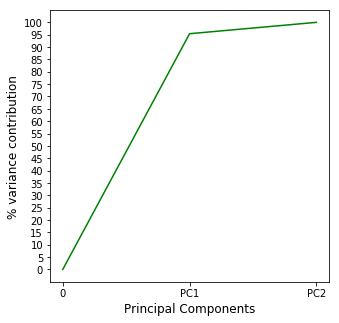

In [101]:
PC = [0, var1*100 , var2*100]
totalVar = [0,var1*100 , (var1+var2)*100]
index = np.arange(len(PC))
label = ["0","PC1","PC2"]
plt.figure(figsize=(5,5))

plt.xlabel("Principal Components", fontsize=12)
plt.ylabel("% variance contribution", fontsize=12)
plt.xticks(index, label, fontsize=10)
y_ticks = list(range(0, 101, 5))
plt.yticks(y_ticks, y_ticks)
plt.plot(label, totalVar , color="green")
plt.show()

[[ 0.9495992  -0.31346668]
 [ 0.31346668  0.9495992 ]]


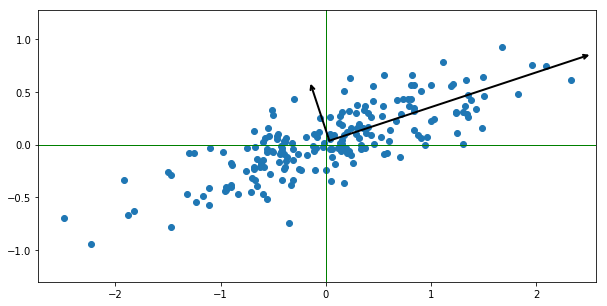

In [253]:
#Plot the Eigenvectors over the 2d dataset
plt.figure(figsize=(10,5))
plt.axis("equal")
plt.axhline(linewidth=1, color="g")
plt.axvline(linewidth=1, color="g")
plt.scatter(dataset[:, 0], dataset[:, 1])

#Plot the vectors
print(eig_vectors)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle="->",
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate("", v1, v0, arrowprops=arrowprops)

# plot data
for length, vector in zip(eig_values, eig_vectors.T):
    v = vector * 3 * np.sqrt(length)
    draw_vector(dataset_mean, dataset_mean + v)

plt.show()

In [112]:
PC1 = eig_vectors[0]
W = np.transpose([PC1])
print (np.matrix(W))

[[ 0.9495992 ]
 [-0.31346668]]


Original shape:    (200, 2)
Transformed shape: (200, 1)


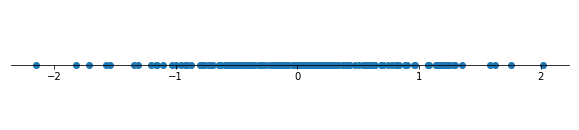

In [120]:
T = dataset.dot(W)
# print(np.matrix(T))

print("Original shape:   ", dataset.shape)
print("Transformed shape:", T.shape)

# Resulting PCA output dataset in 1D
plt.figure(figsize=(10,2))
plt.axis("equal")
plt.scatter(T, 200*[0])
plt.yticks([],[])
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

PC1 Accounts for: 95.4053887769975 
PC2 Accounts for: 4.594611223002501 
--------------------------------------
original shape:    (200, 2)
transformed shape: (200, 1)
--------------------------------------
pca component:  [[-0.9495992  -0.31346668]]
pca explained variance ratio: [0.95405389]


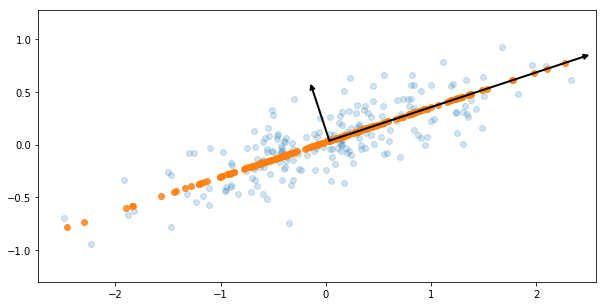

In [254]:
#One more time but with the PCA method from sklearn:
pca = PCA(n_components=2)
pca.fit(dataset)

#Sum of all variance ratios
sum_variance_ratios = sum(pca.explained_variance_ratio_)
pc1_var = pca.explained_variance_ratio_[0]/sum_variance_ratios 
pc2_var = pca.explained_variance_ratio_[1]/sum_variance_ratios

print ("PC1 Accounts for: %s " %(pc1_var*100))
print ("PC2 Accounts for: %s " %(pc2_var*100))
print('--------------------------------------')

#Reduce dataset to 1D
pca = PCA(n_components=1)
pca.fit(dataset)
dataset_pca = pca.transform(dataset)
print("original shape:   ", dataset.shape)
print("transformed shape:", dataset_pca.shape)
print("--------------------------------------")

#Explained variance
print("pca component: ",pca.components_)
print("pca explained variance ratio:",pca.explained_variance_ratio_)

#Plot initial 2D dataset
plt.figure(figsize=(10,5))
plt.axis("equal")
dataset_new = pca.inverse_transform(dataset_pca)
plt.scatter(dataset[:, 0], dataset[:, 1], alpha=0.2)
#plot pca transformed dataset
plt.scatter(dataset_new[:, 0], dataset_new[:, 1], alpha=0.8)
plt.axis("equal")

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle="->",
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate("", v1, v0, arrowprops=arrowprops)

# plot data
for length, vector in zip(eig_values, eig_vectors.T):
    v = vector * 3 * np.sqrt(length)
    draw_vector(dataset_mean, dataset_mean + v)

plt.show()

**2.** Transformation from a 3D dataset to 2D

[[ -6.89574977  -5.65447173 -11.41128522]
 [  0.6773523    8.19525626   8.44967973]
 [ -7.98947771  -5.91340532  -7.11338931]
 [  1.53858306   2.77376191  -8.2312891 ]
 [ -0.96326631   2.23285428  -7.02531068]]


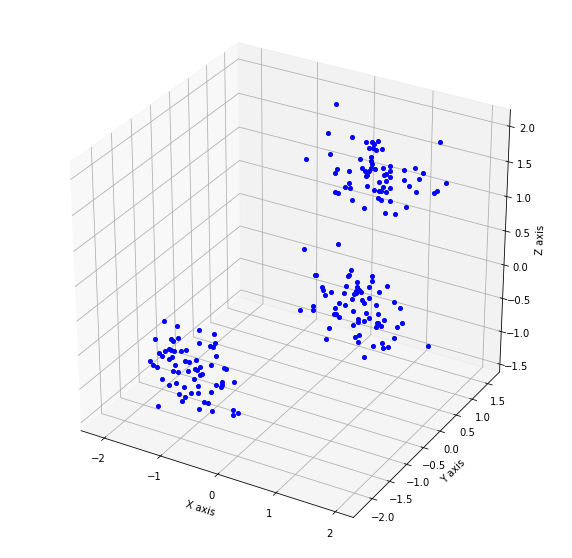

In [132]:
#3D dataset generation:
rng = np.random.RandomState(1)
dataset3D, y = make_blobs(n_samples=200, centers=3, n_features=3, cluster_std=2, random_state=3 )
print(dataset3D[:5])

std_scale = StandardScaler().fit(dataset3D)
dataset3D_S = std_scale.transform(dataset3D)

#Plot in 3D:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
ax.plot(dataset3D_S[:,0],dataset3D_S[:,1],dataset3D_S[:,2], "o", markersize=4, color="blue")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

plt.show()

original shape:    (200, 3)
transformed shape: (200, 3)
pca components:  [[ 0.31330189  0.60367031  0.73309214]
 [-0.65274199 -0.42380417  0.62794739]
 [-0.6897607   0.67525712 -0.26126231]]
pca explained variance ratio:  [0.8505597  0.10745208 0.04198823]


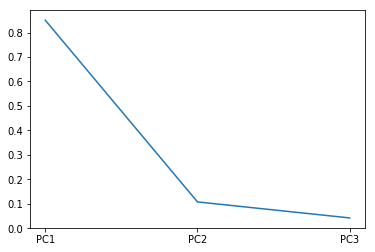

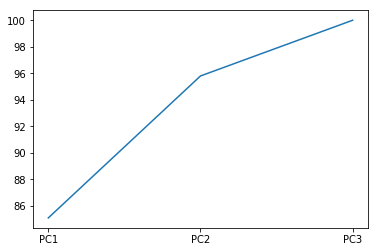

In [147]:
#Using the scikit PCA method:
pca = PCA(n_components=3)
pca.fit(dataset3D)
dataset3D_pca = pca.transform(dataset3D)
print("original shape:   ", dataset3D.shape)
print("transformed shape:", dataset3D_pca.shape)
#Explained variance
print("pca components: ",pca.components_)
print("pca explained variance ratio: ",pca.explained_variance_ratio_)

plt.plot(pca.explained_variance_ratio_)
index = np.arange(len(pca.explained_variance_ratio_))
labels = ["PC1", "PC2", "PC3"]
plt.xticks(index, labels)
plt.show()

#Scree plot - in percetanges
variance_percentage = round(pca.explained_variance_ratio_.sum(),2) * 100
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot(var)
index = np.arange(len(pca.explained_variance_ratio_))
labels = ["PC1", "PC2", "PC3"]
plt.xticks(index, labels)
plt.show()

original shape:    (200, 3)
transformed shape: (200, 2)
pca components  [[ 0.31330189  0.60367031  0.73309214]
 [-0.65274199 -0.42380417  0.62794739]]
pca explained variance ratio  [0.8505597  0.10745208]


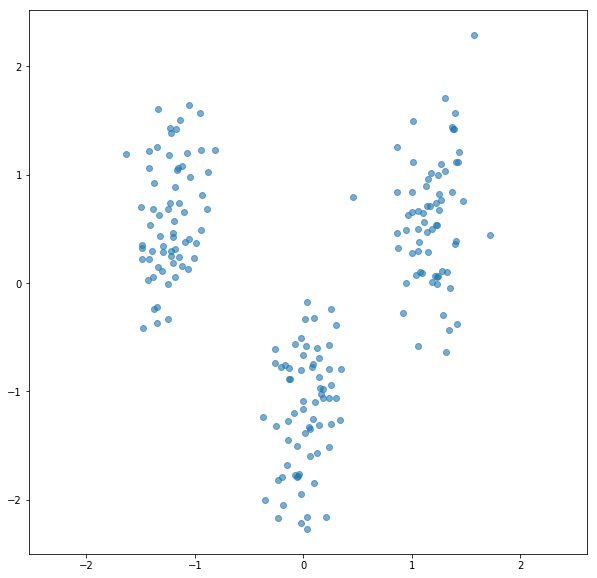

In [219]:
pca = PCA(n_components=2)
pca.fit(dataset3D)
dataset3D_pca_to_2D = pca.transform(dataset3D)
print("original shape:   ", dataset3D.shape)
print("transformed shape:", dataset3D_pca_to_2D.shape)
#Explained variance
print("pca components ",pca.components_)
print("pca explained variance ratio ",pca.explained_variance_ratio_)


std_scale = StandardScaler().fit(dataset3D_pca_to_2D)
dataset3D_pca_to_2D_S = std_scale.transform(dataset3D_pca_to_2D)

#Plot resulting 2D dataset
plt.figure(figsize=(10,10))
plt.axis("equal")
plt.scatter(dataset3D_pca_to_2D_S[:, 0], dataset3D_pca_to_2D_S[:, 1], alpha=0.6)
plt.show()

**In regard to hypothesis testing** <br />
Principal component analysis is the first phase of Exploratory factor analysis (EFA) which is used to identify complex interrelationships among items and group items that are part of unified concepts. PCA is a technique that is intended to describe patterns in a dataset, rather than test formal statistical hypotheses. *As such, the researcher makes no a priori assumptions about relationships among factors.* <br />
PCA is an exploratory data analysis method and does not test a null hypothesis or generate a p-value. Therefore, the hypothesis that this research will try to test instead is whether a multidimensional dataset (in this case, 24D) can be seccessfully reduced to 3D or less by applying PCA and preserving the majority of the total variance ($>$70%).<br />

**Data acquisition, cleaning and manipulation** <br />
In the examples above, this research tests algorithms on small, synthetically generated datasets. (In general, this is useful because one can compute the answers by hand (if necessary) and compare them with the answers produced by the code. In some cases, small datasets can even have special numbers which will allow one to compute the answers by hand easily.) <br />
For this purpose, 3D or 4D datasets were generated by the numpy random generator method. <br />
For the last example, we will use a 24D dataset with nutritional values, vitamin and mineral contents of major food groups. In terms of cleaning the data, we will use the pandas' get_numeric_data method to exclude text columns from the analysis. (An alternative would be to replace text with a corresponding ID number).<br />
Furthermore, **feature scaling through standardization** is an important preprocessing step. Whether to standardize the data prior to a PCA on the covariance matrix depends on the measurement scales of the original features. Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially if it was measured on different scales. To do this, one can use *StandardScaler* from scikit learn to help standardize the dataset’s features onto unit scale (with mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. Another approach is to use a **logarithmic transform** to reduce the influence of extreme values or outliers if there are any.

**3.** Transformation of a 24D dataset

In [4]:
input_file = "nutrition-24D.csv"

# comma delimited
df = pd.read_csv(input_file, sep = ",")

# put the original column names in a python list
original_headers = list(df.columns.values)

# # remove the non-numeric columns
df = df._get_numeric_data()

# put the numeric column names in a python list
numeric_headers = list(df.columns.values)

# create a numpy array with the numeric values for input into scikit-learn
numpy_array = df.values

# write to an excel spreadsheet
df.to_excel("exported_nutritions_data.xls")

print ("Loaded original features count:", len(original_headers))
print ("Loaded data shape:", numpy_array.shape)


Loaded original features count: 25
Loaded data shape: (8618, 24)


[[1.001e+03 7.170e+02 8.500e-01 8.111e+01 6.000e-02 6.000e-02 0.000e+00
  6.840e+02 3.000e-03 1.700e-01 0.000e+00 2.320e+00 3.000e+00 4.200e-02
  3.400e-02 5.000e-03 2.400e+01 0.000e+00 2.000e-02 2.000e+00 0.000e+00
  2.400e+01 1.000e+00 9.000e-02]]
--------------------------------------
['ID', 'ShortDescrip', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg']
original shape:    (8618, 24)
transformed shape: (8618, 24)
--------------------------------------
pca explained variance ratio (Before scaling data):  [9.91141255e-01 7.08108688e-03 7.94644700e-04 3.96643178e-04
 3.00950895e-04 2.01839303e-04 3.85464830e-05 2.61578502e-05
 9.28428647e-06 6.24587354e-06 1.16068553e-06 9.27751989e-07
 3.96333140e-07 2.60413841e-07 1.47402162e-07 1.342

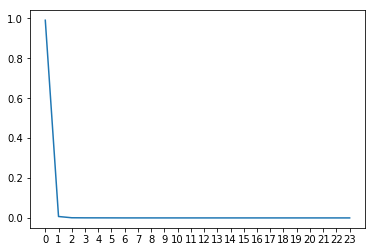

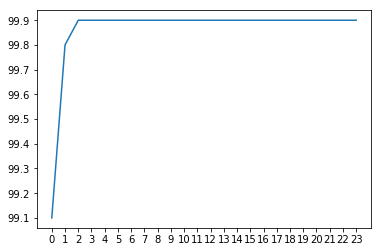

In [211]:
big_data_set = numpy_array
print(big_data_set[:1])
print('--------------------------------------')
print(original_headers)

#-------------
pca = PCA(n_components=24)
pca.fit(big_data_set)
big_data_set_pca = pca.transform(big_data_set)
print("original shape:   ", big_data_set.shape)
print("transformed shape:", big_data_set.shape)
print('--------------------------------------')

#Explained variance
# print("pca components: ",pca.components_)
print("pca explained variance ratio (Before scaling data): ", pca.explained_variance_ratio_)
print('--------------------------------------')

# Plot the explained variance
plt.plot(pca.explained_variance_ratio_)
index = np.arange(len(pca.explained_variance_ratio_))
labels = list(range(0,25))
plt.xticks(index, labels)
plt.show()

# Scree plot
variance_percentage = round(pca.explained_variance_ratio_.sum(),2) * 100
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3) * 100)
labels = list(range(0,25))
plt.xticks(index, labels)
plt.plot(var)
plt.show()

original shape:    (8618, 24)
transformed shape: (8618, 24)
pca explained variance ratio after scaling: [2.27054446e-01 1.09327160e-01 8.49399937e-02 7.83123699e-02
 6.81531608e-02 5.28102363e-02 4.43084355e-02 4.13131040e-02
 3.73283028e-02 3.44743855e-02 3.41090983e-02 2.93533711e-02
 2.44602921e-02 2.10301789e-02 1.95249533e-02 1.68426149e-02
 1.40374511e-02 1.34592797e-02 1.31322729e-02 1.06347933e-02
 9.92057172e-03 8.69521978e-03 6.62029916e-03 1.58008846e-04]


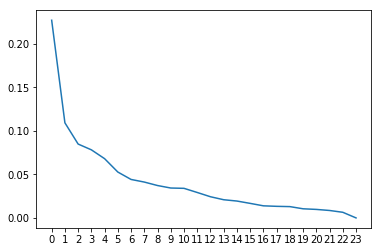

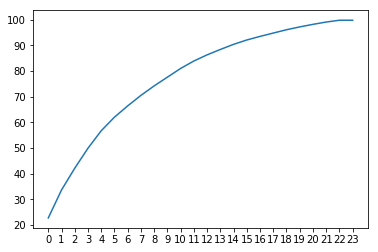

In [231]:
pca = PCA(n_components=24)

# Feature Scaling - Standardization
std_scale = StandardScaler().fit(big_data_set)
big_data_set_S = std_scale.transform(big_data_set)

pca.fit(big_data_set_S)
big_data_set_pca_S = pca.transform(big_data_set_S)

print("original shape:   ", big_data_set.shape)
print("transformed shape:", big_data_set_pca_S.shape)

#Explained variance
# print("pca components ", pca.components_)
print("pca explained variance ratio after scaling:",pca.explained_variance_ratio_)

# Plot the explained variance
plt.plot(pca.explained_variance_ratio_)
index = np.arange(len(pca.explained_variance_ratio_))
labels = list(range(0,25))
plt.xticks(index, labels)
plt.show()

# Scree plot - displays the variance explained by each PC within the analysis
variance_percentage = round(pca.explained_variance_ratio_.sum(),2) * 100
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3) * 100)
labels = list(range(0,25))
plt.xticks(index, labels)
plt.plot(var)
plt.show()


Observing the results after scaling the input data, we can conclude that **the first three principal components only account for approx. 40% of the total variance which is deemed insufficient.** <br />
The first several components explain less of the variance than our hypothesis expected. In other words, the variables do not go together as well as we thought they would, thereby **disproving the hypothesis.**

Nevertheless, here is how the remainder of the code implementation would have looked like if the explained variance ratio were high enough and we wanted to proceed:

original shape:    (8618, 24)
transformed shape: (8618, 2)


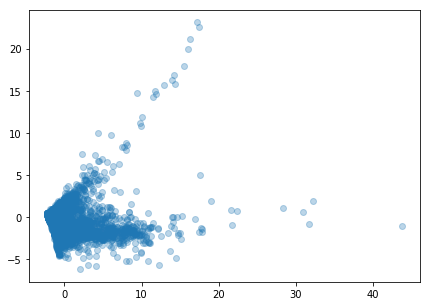

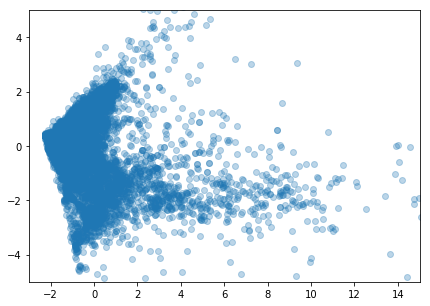

In [255]:
pca = PCA(n_components=2)

# Feature Scaling - Standardization
std_scale = StandardScaler().fit(big_data_set)
big_data_set_S = std_scale.transform(big_data_set)

pca.fit(big_data_set_S)
big_data_set_pca_S = pca.transform(big_data_set_S)

print("original shape:   ", big_data_set.shape)
print("transformed shape:", big_data_set_pca_S.shape)

#Plot resulting 2D dataset
plt.figure(figsize=(7,5))
plt.scatter(big_data_set_pca_S[:, 0], big_data_set_pca_S[:, 1], alpha=0.3)
plt.show()


#Plot resulting 2D dataset
plt.figure(figsize=(7,5))
xmin = -3
xmax = 15
ymin = -5
ymax = 5
plt.axis([xmin,xmax,ymin,ymax])
plt.scatter(big_data_set_pca_S[:, 0], big_data_set_pca_S[:, 1], alpha=0.3)
plt.show()

original shape:    (8618, 24)
transformed shape: (8618, 3)


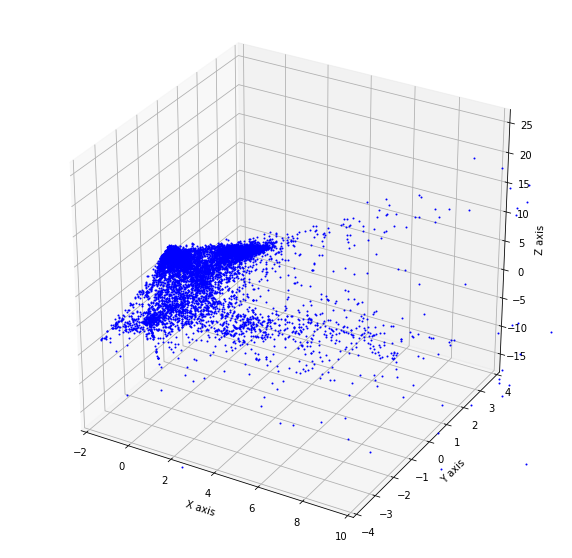

In [230]:
pca = PCA(n_components=3)

# Feature Scaling - Standardization
std_scale = StandardScaler().fit(big_data_set)
big_data_set_S = std_scale.transform(big_data_set)

pca.fit(big_data_set_S)
big_data_set_pca_S = pca.transform(big_data_set_S)

print("original shape:   ", big_data_set.shape)
print("transformed shape:", big_data_set_pca_S.shape)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")


#Zoom in by scaling the plot
xmin = -2
xmax = 10
ymin = -4
ymax = 4
plt.axis([xmin,xmax,ymin,ymax])

ax.plot(big_data_set_pca_S[:,0],
        big_data_set_pca_S[:,1],
        big_data_set_pca_S[:,2], "o", markersize=1, color="blue")
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

plt.show()

Vit.C content vs Energy values


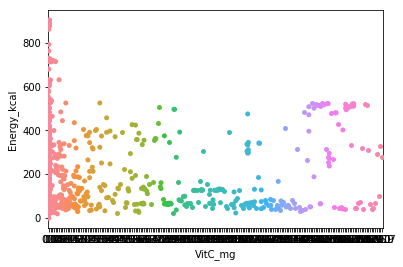

In [207]:
# Additional analysis with Seaborn

# 'ID', 'ShortDescrip', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 
# 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 
# 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 
# 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'

sns.swarmplot(x="VitC_mg", y="Energy_kcal", data=df[:1000])
print("Vit.C content vs Energy values")

#  -> The majority of foods with high Vit.C content seem to have below average calorie levels. 
#  Also, the highest-ranking foods in terms of calories have virtually no Vit.C.

Fat in grams vs Iron Content, mg


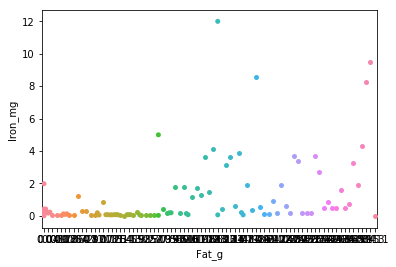

In [205]:
# 'ID', 'ShortDescrip', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 
# 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 
# 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 
# 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'

sns.swarmplot(x="Fat_g", y="Iron_mg", data=df[100:200])
print("Fat in grams vs Iron Content, mg")

#  -> Foods with high iron content also tend to be high in fat.

**Conclusion** <br />
Performing PCA is quite simple in practice:
1. Organize a data set as an $m × n$ matrix, where $m$ is the number of measurement types and $n$ is the number of trials
2. Subtract off the mean for each measurement type or row $x_i$.
3. Calculate the SVD or the eigenvectors of the co-variance.

Both the strength and weakness of PCA is that it is a non-parametric analysis. One only needs to make certain assumptions and then calculate thecorresponding answer. There are no parameters to tweak and no coefficients to adjust based on user experience - the answer is unique and independent of the user. However, this very same strength can also be viewed as a weakness. If one knows a-priori some features of the structure of a system, then it makes sense to incorporate these assumptions into a parametric algorithm.<br />

Nevertheless, PCA has been called one of the most important results from applied linear algebra. Since its most common use is as the first step in trying to analyze large data sets, and there is a data deluge consequent to the development of big databases, the relevance of principal component analysis is continously increasing, making it an exceedingly useful tool for any data scientist. <br />


**References:**
- Gilbert Strang  - Introduction to Linear Algebra, Fifth Edition, Wellesley-Cambridge Press, 2016
- Harvard Lectures - Oliver Knill, Math 19b: Linear Algebra with Probability, Lecture 35: Symmetric matrices
- Carlo Tomasi - Orthogonal Matrices and the Singular Value Decomposition
- Jolliffe I.  - Principal Component Analysis, 2ed., Springer, 2002
- Lindsay I Smith - A Tutorial on Principal Components Analysis, 2002
- Jonathon Shlens - A Tutorial on Principal Component Analysis - Derivation, Discussion and Singular Value Decomposition, Institute for Nonlinear Science, University of California, San Diego, 2003
- Kevin J. Parsons , W. James Cooper, R. Craig Albertson - Limits of Principal Components Analysis for Producing a Common Trait Space, 2009
- Diana D. Suhr, Ph.D. - Principal Component Analysis vs. Exploratory Factor Analysis, University of Northern Colorado